In [17]:
import pandas as pd
import yfinance as yf

spy = yf.Ticker('SPY')
spy_data = spy.history(period='max')
spy_data = spy_data.drop(columns=['Dividends', 'Capital Gains', 'Stock Splits'])
spy_data = spy_data.loc['1996-01-01':].copy()
spy_data


,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02 00:00:00-05:00,36.906023,37.347393,36.868460,37.347393,514400
1996-01-03 00:00:00-05:00,37.469473,37.563381,37.262874,37.450691,610300
1996-01-04 00:00:00-05:00,37.497652,37.638514,36.793338,37.093845,1129700
1996-01-05 00:00:00-05:00,36.849683,37.112627,36.765166,37.018719,302400
1996-01-08 00:00:00-05:00,37.150178,37.206523,37.103224,37.159569,179900
...,...,...,...,...,...
2024-12-27 00:00:00-05:00,597.539978,597.780029,590.760010,595.010010,64969300
2024-12-30 00:00:00-05:00,587.890015,591.739990,584.409973,588.219971,56578800
2024-12-31 00:00:00-05:00,589.909973,590.640015,584.419983,586.080017,57052700


In [18]:
spy_data.index

DatetimeIndex(['1996-01-02 00:00:00-05:00', '1996-01-03 00:00:00-05:00',
               '1996-01-04 00:00:00-05:00', '1996-01-05 00:00:00-05:00',
               '1996-01-08 00:00:00-05:00', '1996-01-09 00:00:00-05:00',
               '1996-01-10 00:00:00-05:00', '1996-01-11 00:00:00-05:00',
               '1996-01-12 00:00:00-05:00', '1996-01-15 00:00:00-05:00',
               ...
               '2024-12-19 00:00:00-05:00', '2024-12-20 00:00:00-05:00',
               '2024-12-23 00:00:00-05:00', '2024-12-24 00:00:00-05:00',
               '2024-12-26 00:00:00-05:00', '2024-12-27 00:00:00-05:00',
               '2024-12-30 00:00:00-05:00', '2024-12-31 00:00:00-05:00',
               '2025-01-02 00:00:00-05:00', '2025-01-03 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=7302, freq=None)

<Axes: xlabel='Date'>

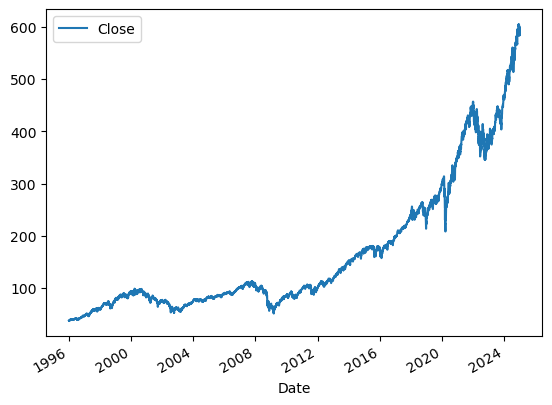

In [19]:
spy_data.plot.line(y='Close', use_index=True)


In [20]:
spy_data['Tommorow'] = spy_data['Close'].shift(-1)
spy_data

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
1996-01-02 00:00:00-05:00,36.906023,37.347393,36.868460,37.347393,514400,37.450691
1996-01-03 00:00:00-05:00,37.469473,37.563381,37.262874,37.450691,610300,37.093845
1996-01-04 00:00:00-05:00,37.497652,37.638514,36.793338,37.093845,1129700,37.018719
1996-01-05 00:00:00-05:00,36.849683,37.112627,36.765166,37.018719,302400,37.159569
1996-01-08 00:00:00-05:00,37.150178,37.206523,37.103224,37.159569,179900,36.521011
...,...,...,...,...,...,...
2024-12-27 00:00:00-05:00,597.539978,597.780029,590.760010,595.010010,64969300,588.219971
2024-12-30 00:00:00-05:00,587.890015,591.739990,584.409973,588.219971,56578800,586.080017
2024-12-31 00:00:00-05:00,589.909973,590.640015,584.419983,586.080017,57052700,584.640015


In [21]:
spy_data['Target'] = (spy_data['Tommorow'] > spy_data['Close']).astype(int)
spy_data

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1996-01-02 00:00:00-05:00,36.906023,37.347393,36.868460,37.347393,514400,37.450691,1
1996-01-03 00:00:00-05:00,37.469473,37.563381,37.262874,37.450691,610300,37.093845,0
1996-01-04 00:00:00-05:00,37.497652,37.638514,36.793338,37.093845,1129700,37.018719,0
1996-01-05 00:00:00-05:00,36.849683,37.112627,36.765166,37.018719,302400,37.159569,1
1996-01-08 00:00:00-05:00,37.150178,37.206523,37.103224,37.159569,179900,36.521011,0
...,...,...,...,...,...,...,...
2024-12-27 00:00:00-05:00,597.539978,597.780029,590.760010,595.010010,64969300,588.219971,0
2024-12-30 00:00:00-05:00,587.890015,591.739990,584.409973,588.219971,56578800,586.080017,0
2024-12-31 00:00:00-05:00,589.909973,590.640015,584.419983,586.080017,57052700,584.640015,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier